In [1]:
import os
import pandas as pd

from nloop import Text

%load_ext autoreload
%autoreload 2

# Load Data

In [3]:
data_fname = os.path.join("nloop", "data", "IMDB-Movie-Data.csv")
data = pd.read_csv(data_fname)

In [4]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Text Class

In [6]:
text = Text(data, column="Description")

Removing stopwords...



Finding bigrams...



Finding trigrams...



Lemmatizing nouns...



Lemmatizing verbs...



Stemming...



Done!


In [71]:
text.token_counter.most_common(8)

[('life', 132),
 ('find', 96),
 ('world', 81),
 ('take', 75),
 ('new', 74),
 ('becom', 74),
 ('man', 73),
 ('famili', 72)]

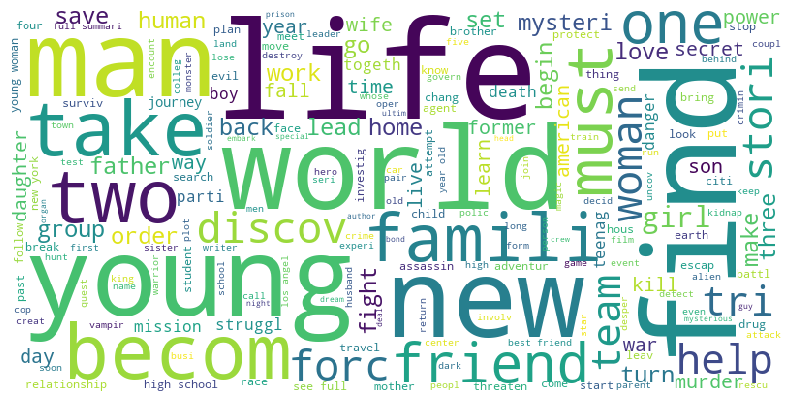

In [8]:
text.show_wordcloud()

# Topic modeling 


## LDA

In [37]:
text.lda.run()

Done!
Checkout lda.model


In [38]:
text.lda.model.show_topics(8,4)

[(27, '0.004*"biggest" + 0.004*"gang" + 0.004*"sacrific" + 0.003*"neighbor"'),
 (8, '0.004*"cross" + 0.003*"pageant" + 0.003*"vw" + 0.003*"special"'),
 (23, '0.006*"los angel" + 0.004*"back" + 0.004*"gig" + 0.003*"offer"'),
 (45,
  '0.006*"relationship" + 0.005*"might" + 0.004*"question" + 0.004*"event"'),
 (24, '0.003*"unleash" + 0.003*"emili" + 0.003*"mill" + 0.003*"new"'),
 (21, '0.005*"superhuman" + 0.004*"reveng" + 0.004*"stop" + 0.004*"abil"'),
 (31, '0.006*"yet" + 0.006*"steel" + 0.004*"pull" + 0.003*"max"'),
 (0, '0.004*"put" + 0.004*"coast" + 0.004*"child" + 0.004*"video"')]

In [22]:
text.lda.coherence_score()

0.3506947312569426

## Grid Search + Coherence Score


In [67]:
parameters = {'num_topics': [5, 50, 100, 150], 'alpha': [0.1, 0.5]}

grid_df = text.lda.grid_search(parameters, text.lda.coherence_score, kwargs={"coherence":"c_v",})

0 {'alpha': 0.1, 'num_topics': 5.0}
Done!
Checkout lda.model
1 {'alpha': 0.1, 'num_topics': 50.0}
Done!
Checkout lda.model
2 {'alpha': 0.1, 'num_topics': 100.0}
Done!
Checkout lda.model
3 {'alpha': 0.1, 'num_topics': 150.0}
Done!
Checkout lda.model
4 {'alpha': 0.5, 'num_topics': 5.0}
Done!
Checkout lda.model
5 {'alpha': 0.5, 'num_topics': 50.0}
Done!
Checkout lda.model
6 {'alpha': 0.5, 'num_topics': 100.0}
Done!
Checkout lda.model
7 {'alpha': 0.5, 'num_topics': 150.0}
Done!
Checkout lda.model


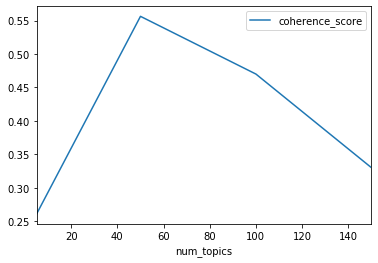

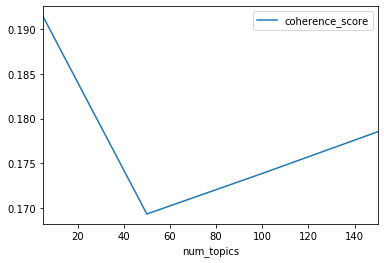

In [68]:
import matplotlib.pyplot as plt
grid_df[grid_df['alpha']==0.1].plot("num_topics", "coherence_score")
grid_df[grid_df['alpha']==0.5].plot("num_topics", "coherence_score")

In [69]:
text.lda.run(num_topics=50, alpha=0.1)

Done!
Checkout lda.model


In [70]:
text.lda.model.show_topics(8,4)

[(27, '0.005*"gang" + 0.004*"hitman" + 0.004*"earli" + 0.004*"hollywood"'),
 (8, '0.004*"ask" + 0.004*"one" + 0.004*"radio" + 0.003*"big"'),
 (23, '0.005*"los angel" + 0.004*"back" + 0.004*"girl" + 0.004*"gig"'),
 (45,
  '0.006*"relationship" + 0.004*"high school" + 0.004*"might" + 0.004*"life"'),
 (24,
  '0.006*"teenage girl" + 0.004*"blind" + 0.004*"target" + 0.003*"unleash"'),
 (21, '0.005*"superhuman" + 0.005*"may" + 0.004*"daughter" + 0.004*"reveng"'),
 (31, '0.006*"steel" + 0.005*"attic" + 0.004*"crew" + 0.004*"new"'),
 (0, '0.006*"reunit" + 0.005*"pair" + 0.005*"hometown" + 0.004*"explor"')]

# Similarity Matrix

In [39]:
text.similarity.matrix

array([[0.99999994, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.02426816],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.02426816, 0.        , ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [42]:
data_subset = data[(data.Rating>8) & (data.Votes>500000)]
text_subset = Text(data_subset, column="Description")

Removing stopwords...



Finding bigrams...



Finding trigrams...



Lemmatizing nouns...



Lemmatizing verbs...



Stemming...



Done!


In [45]:
text.similarity.index(text_subset.corpus_tfidf)

array([[0.9273455 , 0.10027666, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.8183295 , 0.        , ..., 0.        , 0.        ,
        0.06399821],
       [0.07147183, 0.18315347, 0.8581903 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.05677277,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [48]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [63]:
mergings = linkage(text.similarity.index(text_subset.corpus_tfidf), method="complete")

In [64]:
titles = data_subset.Title.values
genres = data_subset.Genre.values

In [65]:
plot_labels = [title + " | " + genre for title,genre in zip(titles,genres)]

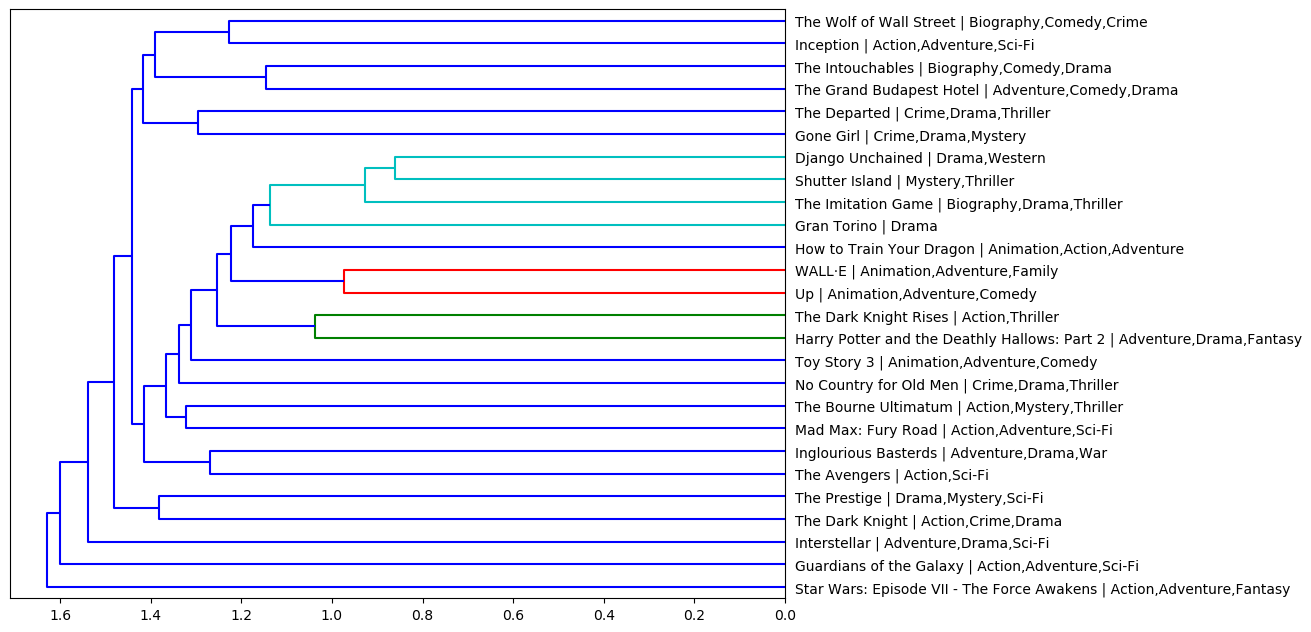

In [66]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,0.3*len(plot_labels)),dpi=100)
_ = dendrogram(mergings, orientation="left", labels=plot_labels)
